# Project 2: Getting started

This guides builds upon the week 1 notebooks for [getting started](https://colab.research.google.com/drive/1oyFm3hftLneEQlUK19SELlkvUguCFrw_?usp=sharing) and [the project](https://colab.research.google.com/drive/1mje_YUaKGFpgmrACwpFLCyqWuIMN76Pe?usp=sharing). Feel free to take a look at those notebooks to freshen up your knowledge.

First, install the required dependencies.

In [ ]:
!pip install "distilabel[hf-inference-endpoints, instructor, outlines]" "huggingface-hub" "textdescriptives" "gliclass" "numpy==1.26.4" -U -q

Next, we can log in to the Hugging Face Hub and configure our token through the login method.

In [ ]:
from huggingface_hub import login

login()

In [ ]:
from huggingface_hub import login
from google.colab import userdata

login(token=(userdata.get('HF_TOKEN')))

## 1. Generate a dataset for preference tuning

Let's go over some common patterns for synthetic data generation.

### Load and use your own dataset

In [ ]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromHub
from distilabel.steps.tasks import SelfInstruct, TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromHub(repo_id="argilla/distilabel-intel-orca-dpo-pairs", num_examples=1)
    llm = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
    )
    gen_a = TextGeneration(llm=llm, input_mappings={"instruction": "input"})
    data >> gen_a

distiset = pipeline.run(use_cache=False)
distiset

[03/26/25 17:28:56] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=300426;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=538079;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_hub_0_text_gen             
                             eration_0/48987b8ac6f1995d3deb7710832316099b19d037/executions/9df0f45f7e5             
                             8222aeda6e09f9a78f6c9c14d364a/data/steps_outputs'                                     

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=154264;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=572274;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_hub_0'                                                        
                                - 🔄 'text_generation_0'                                                           

[03/26/25 17:28:57] INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=995172;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=51010;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/26/25 17:28:59] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/2                 ]8;id=235559;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=218701;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_hub_0' replicas: 1/1                                               
                              * 'text_generation_0' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=585046;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=210570;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🚰 Starting yielding      ]8;id=931593;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=727412;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_hub_0'. Offset: 0                         

                    INFO     ['distilabel.step.load_data_from_hub_0'] 📨 Step                   ]8;id=69919;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=857007;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_hub_0' sending batch 0 to output queue                                

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🏁 Finished running step  ]8;id=613892;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=377109;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'load_data_from_hub_0' (replica ID: 0)                                                

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=78116;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=673159;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[03/26/25 17:29:01] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=64041;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=418908;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=457572;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=524342;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train', 'generation', 'distilabel_metadata', 'model_name'],
            num_rows: 1
        })
    })
})

### Using conversational completion

Instead of working with string we might deal with some data that is formatted like a conversation `[{"role": "user", "content": "hello"}]`. We can then use the `ChatGeneration` class to generate completions for this.

In [ ]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps.tasks import ChatGeneration, MagpieGenerator

with Pipeline() as pipeline:
    llm_magpie = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.3-70B-Instruct",
        tokenizer_id="meta-llama/Llama-3.3-70B-Instruct",
        magpie_pre_query_template="llama3",
        use_magpie_template=True,
        generation_kwargs={"max_new_tokens": 2000},
    )
    llm_worse = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
        generation_kwargs={"max_new_tokens": 2000},
    )
    llm_better = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.3-70B-Instruct"
    )
    gen_a = MagpieGenerator(llm=llm_magpie, end_with_user=True, num_rows=1, n_turns=2)
    gen_b = ChatGeneration(
        llm=llm_worse,
        input_mappings={"messages": "conversation"},
        output_mappings={"generation": "rejected"}
    )
    gen_c = ChatGeneration(
        llm=llm_better,
        input_mappings={"messages": "conversation"},
        output_mappings={"generation": "chosen"}
    )
    gen_a >> gen_b >> gen_c

# distiset = pipeline.run(use_cache=False)
# distiset

### Visualising pipelines

We can also first visualise pipelines using a built-in print method



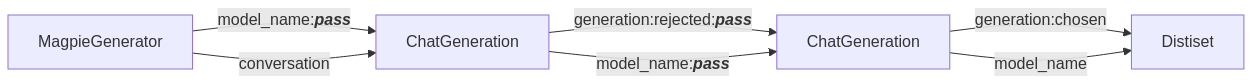

In [ ]:
pipeline

### Run pipelines with different generation arguments

When reruning the pipeline, we can change and adapt the arguments used.

In [ ]:
pipeline.run(
    use_cache=False,
    parameters={
        gen_a.name: {
            "num_rows": 2
        }
    }
)

### Creating your own prompt templates

Prompting is cool but we find it sometimes works better when working with our own prompt templates.

In [ ]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration
from enum import Enum
from pydantic import BaseModel

CUSTOM_TEMPLATE = '''Persona: {{ persona }}

Based on the provided persona, generate a question that the persona might ask to a chatbot or LLM. Only return the question and nothing else.
Question:
'''.rstrip()


with Pipeline() as pipeline:
    data = LoadDataFromDicts(
        data=[
            {
                "persona": "An AI data scientist."
            }
        ]
    )
    llm = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
    )
    text_gen = TextGeneration(
        llm=llm,
        system_prompt=system_prompt,
        template=CUSTOM_TEMPLATE,
        columns=["persona"],
    )
    data >> text_gen

distiset = pipeline.run(use_cache=False)
distiset["default"]["train"][0]

In [ ]:
CUSTOM_TEMPLATE = '''Persona: {{ persona }}
Context: {{ context }}
Domain: {{ domain }}

Based on the provided persona and some context, generate a question that the persona might ask to a chatbot or LLM. Only return the question and nothing else.
Question:
'''.rstrip()

### Judge with your own prompt templates

Lastly, we can also force our steps to output structure information in a way that we can easily process and score with our prompt templates.

In [ ]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration
from enum import Enum
from pydantic import BaseModel

CUSTOM_TEMPLATE = '''Instruction: {{ instruction }}
Response: {{ response }}

Please evaluate the quality of the response based on the instruction.
Quality scores can range from 1 (very bad) to 10 (very good).
Return a valid JSON.

Quality eval:
'''.rstrip()

system_prompt = "You are a helpful AI assistant. You are great at evaluating interactions."


class QualityScore(BaseModel):
    score: int


with Pipeline() as pipeline:
    data = LoadDataFromDicts(
        data=[
            {
                "instruction": "Generate a short question about data science.",
                "response": "What is data science?"
            }
        ]
    )
    llm = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
        structured_output={"schema": QualityScore},
    )
    text_gen = TextGeneration(
        llm=llm,
        system_prompt=system_prompt,
        template=CUSTOM_TEMPLATE,
        columns=["instruction", "response"],
    )
    data >> text_gen

distiset = pipeline.run(use_cache=False)
distiset["default"]["train"][0]

## 2. Explore and evaluate the generated data

We will nog show some basic data exploration on top of the [argilla/distilabel-intel-orca-dpo-pairs](https://huggingface.co/datasets/argilla/distilabel-intel-orca-dpo-pairs) dataset. This dataset had some original preference pairs and distilabel was used to provide new ratings and evaluate the correctness of the provided pairs.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("argilla/distilabel-intel-orca-dpo-pairs")
dataset

We know, that there is a column that includes rating, which we can use as simple quality filters, so let's focus on all examples where the `chosen` rating is larger than 8.

In [ ]:
dataset_quality = dataset.filter(
    lambda r:
        not r["chosen_score"] is None and
        r["chosen_score"] >= 8
)
dataset_quality

Similarly, we can focus on examples where the difference between chosen and rejected scores is large enough so the model can distinguish between them, while ensuring the difference is not too big.

In [ ]:
dataset_quality_diff = dataset_quality.filter(
    lambda r:
        not r["rating"] is None and
        (max(r["rating"]) - min(r["rating"])) > 1 and
        (max(r["rating"]) - min(r["rating"])) < 4
)
dataset_quality_diff

Great, now we have a good starting subset based off our rating, we can continue to analyse the quality using some additional metrics. We will be using [`text-descriptives`](https://github.com/HLasse/TextDescriptives) to get some quality metrics for our texts. Specifically we will focus on the `flesch_reading_ease`, which indicates how easy a text is to read, where higher scores indicate easier reading.

In [ ]:
import textdescriptives as td


def process_quality(batch):
    df = td.extract_metrics(
        text=batch["chosen"],
        lang="en",
        metrics=["readability"]
    )
    batch["flesch_reading_ease"] = df["flesch_reading_ease"].values
    return batch


dataset_quality_diff_reading = dataset_quality_diff.map(
    process_quality, batched=True
)

Next, we will also be adding some general domain classification using [gliclass](https://github.com/Knowledgator/GLiClass), which is an optimised zero-shot classification model. To further speed up this process, we will also be using a [ModernBERT architecture model](https://huggingface.co/knowledgator/gliclass-modern-large-v2.0-init) which is around 4x quicker on CPU.

In [ ]:
from gliclass import GLiClassModel, ZeroShotClassificationPipeline
from transformers import AutoTokenizer

repo_id = "knowledgator/gliclass-modern-base-v2.0-init"
model = GLiClassModel.from_pretrained(repo_id)
tokenizer = AutoTokenizer.from_pretrained(repo_id)

pipeline = ZeroShotClassificationPipeline(
    model,
    tokenizer,
    device="cuda"
)

We then define out labels and run our batched inference. We do recommend using GPUs for running this part of the pipeline.

In [ ]:
labels = [
    "business and industrial",
    "books and literature",
    "home and garden",
    "adult",
    "science",
    "food and drink",
    "real estate",
    "news",
    "jobs and education",
    "health",
    "hobbies and leisure",
    "games",
    "beauty and fitness",
    "computers and electronics",
    "arts and entertainment",
    "travel and transportation",
    "finance",
    "law and government",
    "sensitive subjects",
    "autos and vehicles",
    "people and society",
    "sports",
    "shopping",
    "online communities",
    "pets and animals",
    "internet and telecom",
]

def process_domains(batch):
    results = pipeline(batch["input"], labels, threshold=0)
    batch["domain"] = [max(res, key=lambda x: x['score'])["label"]
 if res else None for res in results]
    return batch

dataset_quality_diff_reading_domain = dataset_quality_diff_reading.map(
    process_domains, batched=True
)
dataset_quality_diff_reading_domain

### 3. Publish the dataset on Hugging Face

Publish the dataset on the Hugging Face Hub. Make sure you update the ModelCard with all relevant information. Additionally, link the exploratory data analysis and preferably also add an analysis script.

In [ ]:
from datasets import Dataset

dataset_quality_diff_reading_domain.push_to_hub("uplimit/uplimit-synthetic-data-week-2-filtered")

Now, we can go to our dataset page and update the ModelCard with all relevant information. Additionally, we can add an analysis script. A good example for this is the original card attached to [argilla/distilabel-intel-orca-dpo-pairs](https://huggingface.co/datasets/argilla/distilabel-intel-orca-dpo-pairs).